In [34]:
import requests
from bs4 import BeautifulSoup

b'<!doctype html>\n<html lang="fa-IR" dir="rtl" data-theme="light">\n<head>\n  <title data-react-helmet="true">\xd8\xae\xd8\xb1\xdb\x8c\xd8\xaf \xd9\x88 \xd9\x81\xd8\xb1\xd9\x88\xd8\xb4 \xd9\x85\xd8\xa7\xd8\xb4\xdb\x8c\xd9\x86 \xd8\xb3\xd9\x86\xda\xaf\xdb\x8c\xd9\x86\xd8\x8c \xd8\xb3\xd9\x88\xd8\xa7\xd8\xb1\xdb\x8c\xd8\x8c \xd8\xa7\xd8\xac\xd8\xa7\xd8\xb1\xd9\x87 \xd8\xa7\xdb\x8c \xd9\x88 \xda\xa9\xd9\x84\xd8\xa7\xd8\xb3\xdb\x8c\xda\xa9 \xd8\xaf\xd8\xb1 \xd8\xaa\xd9\x87\xd8\xb1\xd8\xa7\xd9\x86 | \xd8\xaf\xdb\x8c\xd9\x88\xd8\xa7\xd8\xb1</title>\n  <meta data-react-helmet="true" name="viewport" content="width=992, initial-scale=1"/><meta data-react-helmet="true" name="description" content="\xd8\xaf\xd8\xb1 \xd8\xaf\xdb\x8c\xd9\x88\xd8\xa7\xd8\xb1\xd8\x8c \xd8\xa8\xd9\x87\xd8\xaa\xd8\xb1\xdb\x8c\xd9\x86 \xd9\x81\xd8\xb1\xd8\xb5\xd8\xaa\xe2\x80\x8c\xd9\x87\xd8\xa7 \xd8\xa8\xd8\xb1\xd8\xa7\xdb\x8c \xd8\xae\xd8\xb1\xdb\x8c\xd8\xaf \xd9\x88 \xd9\x81\xd8\xb1\xd9\x88\xd8\xb4 \xd8\xae\xd9\x88\xd
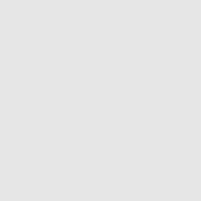
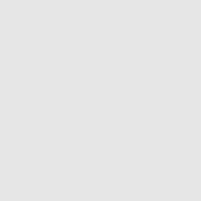
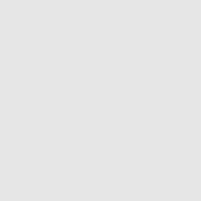
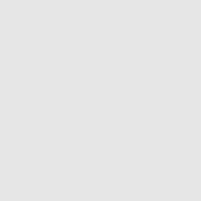
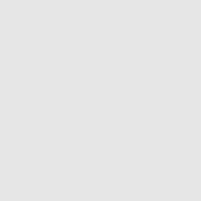
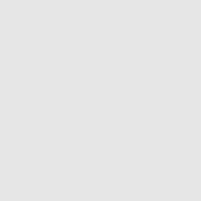
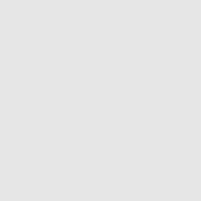
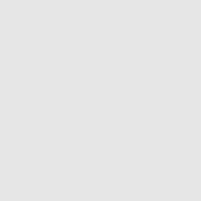
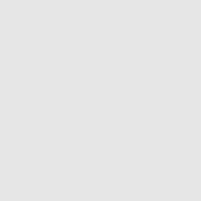
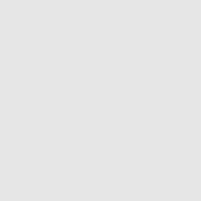
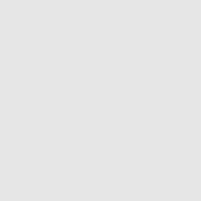
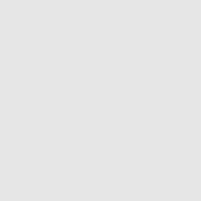
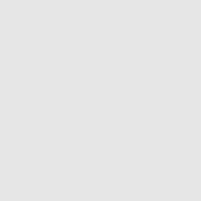
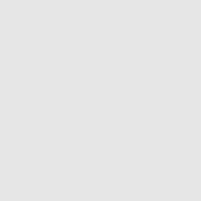
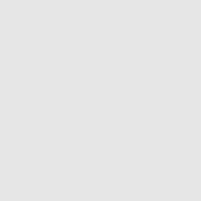
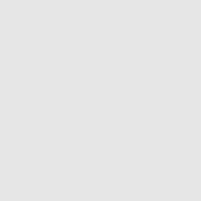
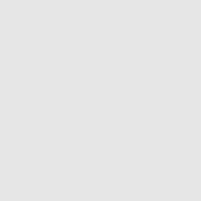
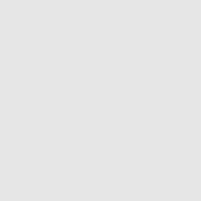
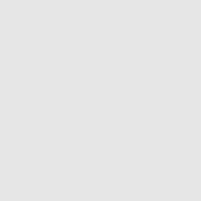
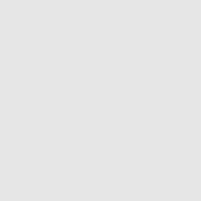
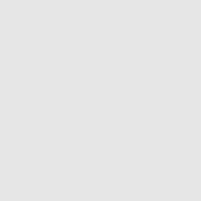
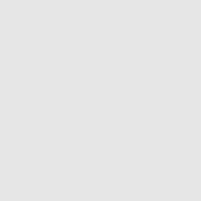

In [35]:
site=requests.get("https://divar.ir/s/tehran/auto")
site.content

<!DOCTYPE html>

<html data-theme="light" dir="rtl" lang="fa-IR">
<head>
<title data-react-helmet="true">خرید و فروش ماشین سنگین، سواری، اجاره ای و کلاسیک در تهران | دیوار</title>
<meta content="width=992, initial-scale=1" data-react-helmet="true" name="viewport"/><meta content="در دیوار، بهترین فرصت‌ها برای خرید و فروش خودروهای سنگین، سواری، اجاره‌ای و کلاسیک در تهران را پیدا کنید." data-react-helmet="true" name="description"/><meta content="summary" data-react-helmet="true" name="twitter:card"/><meta content="@divar_official" data-react-helmet="true" name="twitter:site"/><meta content="https://divar.ir/s/tehran/auto" data-react-helmet="true" name="twitter:url"/><meta content="خرید و فروش ماشین سنگین، سواری، اجاره ای و کلاسیک در تهران | دیوار" data-react-helmet="true" name="twitter:title"/><meta content="در دیوار، بهترین فرصت‌ها برای خرید و فروش خودروهای سنگین، سواری، اجاره‌ای و کلاسیک در تهران را پیدا کنید." data-react-helmet="true" name="twitter:description"/><meta content="https://
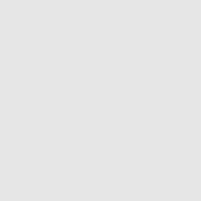
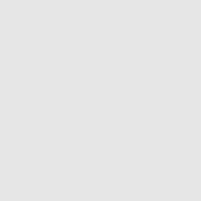
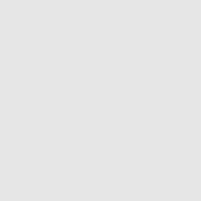
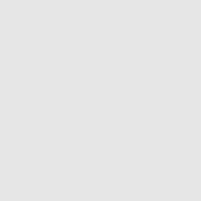
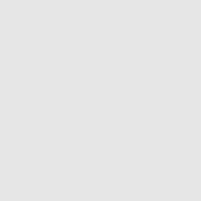
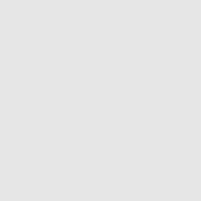
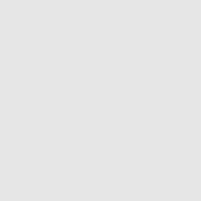
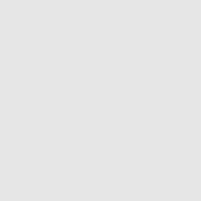
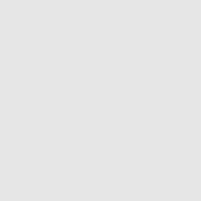
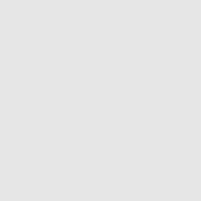
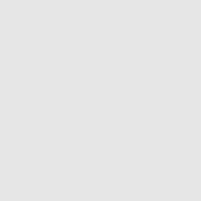
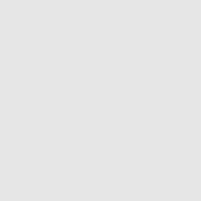
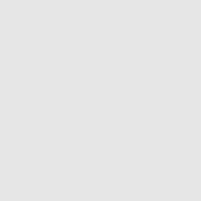
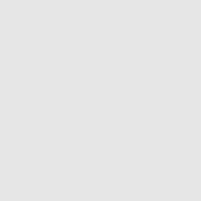
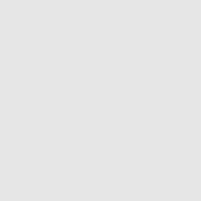
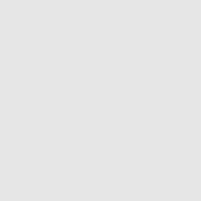
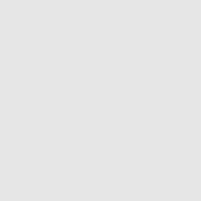
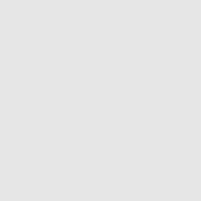
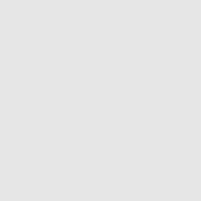
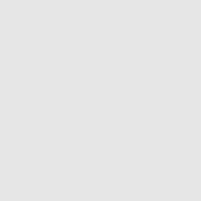
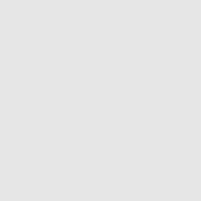
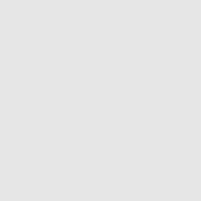

In [36]:
lsite=BeautifulSoup(site.content,"html.parser")
lsite

In [50]:
cars=lsite.find_all("article",class_="unsafe-kt-post-card unsafe-kt-post-card--outlined unsafe-kt-post-card")
len(cars)

22

In [51]:
!pip install selenium

In [54]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
import time, os, urllib

# === Config ===
CAR_LABEL = "206"
TARGET_KEYWORD = "پژو ۲۰۶"
NUM_IMAGES = 50
SAVE_FOLDER = f"dataset/{CAR_LABEL}"
CHROME_DRIVER_PATH = "C:/path/to/chromedriver.exe"  # <-- Change this!

# === Setup driver ===
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")
driver = webdriver.Chrome(service=Service(CHROME_DRIVER_PATH), options=options)

# === Open Divar car listings ===
driver.get("https://divar.ir/s/tehran/auto")
time.sleep(4)

# === Scroll to load more posts ===
for i in range(5):  # Increase for more ads
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)

# === Create folder ===
os.makedirs(SAVE_FOLDER, exist_ok=True)

# === Find ad cards ===
ads = driver.find_elements(By.CLASS_NAME, "kt-post-card__body")

count = 0
for ad in ads:
    try:
        title = ad.find_element(By.CLASS_NAME, "kt-post-card__title").text
        if TARGET_KEYWORD in title:
            img_element = ad.find_element(By.CLASS_NAME, "kt-post-card__image")
            img_url = img_element.value_of_css_property("background-image")
            img_url = img_url.split('"')[1]  # Extract the URL from: url("...")

            print(f"{count+1}. {title}\n  → {img_url}")

            # Save image
            urllib.request.urlretrieve(img_url, f"{SAVE_FOLDER}/image_{count}.jpg")
            count += 1

            if count >= NUM_IMAGES:
                break
    except Exception as e:
        print("❌ Skipped one ad due to error:", e)

# === Done ===
print(f"\n✅ Saved {count} images to {SAVE_FOLDER}")
driver.quit()


NoSuchDriverException: Message: Unable to obtain driver for chrome; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors/driver_location


In [6]:
import requests
from bs4 import BeautifulSoup

url = "https://bama.ir/car"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)',
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')



In [9]:
soup.find_all("div",class_="bama-ad-holder")

[<div class="bama-ad-holder bama-ad-holder-loading" code="zset1qim" data-v-0644818d="" data-v-2e10b548=""><a class="bama-ad listing" data-adcode="zset1qim" data-v-0644818d="" href="/car/detail-zset1qim-suzuki-baleno-1.5liter-2024" onclick="event.preventDefault();" title="سوزوکی، بالنو"><div class="bama-ad__image-box" data-v-0644818d=""><img alt="سوزوکی، بالنو" class="bama-ad__image" data-v-0644818d="" data-v-fcb67f1a="" decoding="async" height="150" loading="eager" src="https://cdn-sth1.bama.ir/uploads/BamaImages/VehicleCarImages/cb422bdc-2fcb-4ab3-8d52-ee7ad3702f58/CarImage_638881097064106354_thumb_900_600.jpg?x-img=v1/format,type_webp/resize,w_240" width="270"/> <!-- --></div> <div class="bama-ad__title-row" data-v-0644818d=""><p class="bama-ad__title" data-v-0644818d=""><span class="text" data-v-0644818d="" data-v-56df998f=""><span class="part" data-v-56df998f="">سوزوکی،</span><span class="part" data-v-56df998f=""> </span><span class="part" data-v-56df998f="">بالنو</span></span></p>

In [ ]:

for car in soup.select('div.listing__item'):
    title = car.select_one('.listing__title').text.strip() if car.select_one('.listing__title') else 'N/A'
    image = car.select_one('img')['src'] if car.select_one('img') else 'No Image'
    print(f"{title} -> {image}")

In [14]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time

# Set up Chrome options
chrome_options = Options()
chrome_options.add_argument('--headless')  # comment this line to see the browser
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument("--window-size=1920,1080")

# Path to your ChromeDriver
service = Service(r"C:\Users\Asus\Downloads\chromedriver-win64 (1)\chromedriver-win64\chromedriver.exe")  # Replace with full path if needed
driver = webdriver.Chrome(service=service, options=chrome_options)

# Go to Bama
driver.get('https://bama.ir/car')

# Wait for page to load
time.sleep(3)

# Scroll to load more cars
for i in range(5):  # scroll 5 times; you can increase this
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)

# Now extract info
cars = driver.find_elements(By.CLASS_NAME, 'bama-ad-holder')
print(cars)


[<selenium.webdriver.remote.webelement.WebElement (session="c4a8e3bbee98c9828f2cadb0b41a1256", element="f.9454C28D17541FC597E0913538C868CD.d.0F053506B25E6DD1EDAED2D351FD059B.e.90")>, <selenium.webdriver.remote.webelement.WebElement (session="c4a8e3bbee98c9828f2cadb0b41a1256", element="f.9454C28D17541FC597E0913538C868CD.d.0F053506B25E6DD1EDAED2D351FD059B.e.91")>, <selenium.webdriver.remote.webelement.WebElement (session="c4a8e3bbee98c9828f2cadb0b41a1256", element="f.9454C28D17541FC597E0913538C868CD.d.0F053506B25E6DD1EDAED2D351FD059B.e.92")>, <selenium.webdriver.remote.webelement.WebElement (session="c4a8e3bbee98c9828f2cadb0b41a1256", element="f.9454C28D17541FC597E0913538C868CD.d.0F053506B25E6DD1EDAED2D351FD059B.e.93")>, <selenium.webdriver.remote.webelement.WebElement (session="c4a8e3bbee98c9828f2cadb0b41a1256", element="f.9454C28D17541FC597E0913538C868CD.d.0F053506B25E6DD1EDAED2D351FD059B.e.94")>, <selenium.webdriver.remote.webelement.WebElement (session="c4a8e3bbee98c9828f2cadb0b41a12

In [15]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time

# Set up Chrome options
chrome_options = Options()
chrome_options.add_argument('--headless')  # comment this line to see the browser
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument("--window-size=1920,1080")

# Path to your ChromeDriver
service = Service(r"C:\Users\Asus\Downloads\chromedriver-win64 (1)\chromedriver-win64\chromedriver.exe")  # Replace with full path if needed
driver = webdriver.Chrome(service=service, options=chrome_options)

# Go to Bama
driver.get('https://bama.ir/car')

# Wait for page to load
time.sleep(3)

# Scroll to load more cars
for i in range(5):  # scroll 5 times; you can increase this
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)

# Now extract info
cars = driver.find_elements(By.CLASS_NAME, 'bama-ad-holder')

for car in cars:
    try:
        title = car.find_element(By.CLASS_NAME, 'bama-ad__title').text.strip()
        price = car.find_element(By.CLASS_NAME, 'bama-ad__price').text.strip()
        image = car.find_element(By.TAG_NAME, 'img').get_attribute('src')
        print(f"{title} | {price} | {image}")
    except Exception as e:
        print(f"Error: {e}")

driver.quit()


اکستریم، TXL | 4,130,000,000 | https://cdn-sth1.bama.ir/uploads/BamaImages/VehicleCarImages/94ce39c4-df16-49c8-9a72-07bc7a23879d/CarImage_638881107170708573_thumb_900_600.jpg?x-img=v1/format,type_webp/resize,w_240
Error: Message: no such element: Unable to locate element: {"method":"css selector","selector":".bama-ad__price"}
  (Session info: chrome=138.0.7204.101); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#nosuchelementexception
Stacktrace:
	GetHandleVerifier [0x0x7ff6c8476f75+76917]
	GetHandleVerifier [0x0x7ff6c8476fd0+77008]
	(No symbol) [0x0x7ff6c8229dea]
	(No symbol) [0x0x7ff6c8280256]
	(No symbol) [0x0x7ff6c828050c]
	(No symbol) [0x0x7ff6c8272d4c]
	(No symbol) [0x0x7ff6c82a84af]
	(No symbol) [0x0x7ff6c8272c16]
	(No symbol) [0x0x7ff6c82a8680]
	(No symbol) [0x0x7ff6c82d065c]
	(No symbol) [0x0x7ff6c82a8243]
	(No symbol) [0x0x7ff6c8271431]
	(No symbol) [0x0x7ff6c82721c3]
	GetHandleVerifier [0x0x7ff6c874d2ad+

KeyboardInterrupt: 

In [30]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time

# ChromeDriver path
chromedriver_path = r"C:\Users\Asus\Downloads\chromedriver-win64 (1)\chromedriver-win64\chromedriver.exe"

# Chrome options
chrome_options = Options()
chrome_options.add_argument("--headless")  # Remove this if you want to see the browser
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--window-size=1920,1080")

# Start driver
service = Service(chromedriver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)
driver.get("https://bama.ir/car")
time.sleep(3)

# Scroll to load more cars
scroll_pause = 2
scroll_count = 1  # Increase for more cars

for _ in range(scroll_count):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(scroll_pause)

# Find all <a> tags that contain both the car name and the link
car_elements = driver.find_elements(By.CSS_SELECTOR, "a.bama-ad.listing")

# Extract name and href
cars = []
for el in car_elements[:10]:  # Limit to 10 cars
    name_el = el.find_element(By.CLASS_NAME, "bama-ad__title")
    name = name_el.text.strip()
    href = el.get_attribute("href")
    if name and href:
        cars.append((name, href))

# Print results
print("Cars found:", len(cars))
for name, href in cars:
    print(f"{name} --> {href}")

driver.quit()


Cars found: 10
ام وی ام، آریزو 5ev --> https://bama.ir/car/detail-mj2vw0ka-mvm-arrizo5ev-kw48-2024
زوتی، آریو --> https://bama.ir/car/detail-z9loetq7-zotye-Ario-1.6l-1395
تویوتا، bz4X --> https://bama.ir/car/detail-iylu2qsm-toyota-bz4x-615max-2024
فونیکس، تیگو 7 پرو مکس --> https://bama.ir/car/detail-jyuz0m8v-fownix-tiggo7promax-1.6literturboawd-1403
لوکانو، L7 --> https://bama.ir/car/detail-zea4tkag-lucano-l7-1.6literturbo-1404
پژو، 206 SD --> https://bama.ir/car/detail-jykmtwmd-peugeot-206sd-v8-1388
لکسوس، NX هیبرید --> https://bama.ir/car/detail-pbnmf9th-lexus-nxhybrid-300h-2015
سوزوکی، بالنو --> https://bama.ir/car/detail-yx3dnjiw-suzuki-baleno-1.5liter-2025
آئودی، Q5 e-tron --> https://bama.ir/car/detail-tpcwd5sm-audi-q5etron-40-2024
نیسان، قشقایی --> https://bama.ir/car/detail-2qrupegr-nissan-qashqai-2wdhonor-2025


In [ ]:
import os
import time
import requests
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By

# === Setup Paths ===
chromedriver_path = r"C:\Users\Asus\Downloads\chromedriver-win64 (1)\chromedriver-win64\chromedriver.exe"
save_folder = "car_detail_images"
os.makedirs(save_folder, exist_ok=True)

# === Chrome Options ===
chrome_options = Options()
chrome_options.add_argument("--headless")  # Optional: see browser if removed
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--window-size=1920,1080")

# === Start Driver ===
service = Service(chromedriver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)
driver.get("https://bama.ir/car")
time.sleep(3)

# === Scroll to Load Cars ===
scroll_pause = 2
scroll_count = 1  # Scroll more if needed
for _ in range(scroll_count):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(scroll_pause)

# === Get First 10 Car Names and Links ===
car_elements = driver.find_elements(By.CSS_SELECTOR, "a.bama-ad.listing")
cars = []
for el in car_elements[:10]:
    try:
        name = el.find_element(By.CLASS_NAME, "bama-ad__title").text.strip()
        href = el.get_attribute("href")
        if name and href:
            cars.append((name, href))
    except:
        continue

print("🔗 Car Links Collected:", len(cars))

# === Visit Each Car Page and Download Image ===
for i, (name, link) in enumerate(cars, 1):
    try:
        driver.get(link)
        time.sleep(2)  # Let page load

        image_el = driver.find_element(By.CLASS_NAME, "ad-image")
        img_url = image_el.get_attribute("src")

        if img_url:
            print(f"✅ {name} -> {img_url}")
            img_data = requests.get(img_url).content
            file_name = f"{i}_{name.replace('/', '_')[:30]}.jpg"
            with open(os.path.join(save_folder, file_name), "wb") as f:
                f.write(img_data)
        else:
            print(f"⚠️ No image for {name}")
    except Exception as e:
        print(f"❌ Error on {name}: {e}")

driver.quit()
print("\n🎉 Done! Images saved to:", save_folder)



✅ Found 0 cars containing '206'

🎉 Done! Images saved in: downloaded_206_images


'206' Cars found: 0


In [22]:
s=0
for name in car_names:
    if "206" in name or "۲۰۶" in name:
        print(name)
s        

پژو، 206
پژو، 206
پژو، 206
پژو، 206
پژو، 206
پژو، 206
پژو، 206
پژو، 206
پژو، 206
پژو، 206
پژو، 206
پژو، 206
پژو، 206 SD
پژو، 206 SD
پژو، 206
پژو، 206
پژو، 206
پژو، 206
پژو، 206 SD
پژو، 206
پژو، 206
پژو، 206
پژو، 206
پژو، 206
پژو، 206
پژو، 206
پژو، 206


0

In [40]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import time

driver_path = r"C:\Users\Asus\Downloads\chromedriver-win64 (1)\chromedriver-win64\chromedriver.exe"

chrome_options = Options()
# chrome_options.add_argument("--headless")  # Uncomment to run without opening browser window

service = Service(driver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)

driver.get('https://bama.ir/car')

scroll_pause_time = 2

# Scroll down until no new cars load
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(scroll_pause_time)
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

# Now extract car names and links
# Now extract car names and links
cars = driver.find_elements("css selector", "div.persianName > a")

car_data = []
for car in cars[:10]:  # Take only the first 10 cars
    name = car.text.strip()
    link = car.get_attribute('href')
    car_data.append((name, link))

driver.quit()

# Print results
for name, link in car_data:
    print(f"{name} --> {link}")

InvalidSessionIdException: Message: invalid session id: session deleted as the browser has closed the connection
from disconnected: not connected to DevTools
  (Session info: chrome=138.0.7204.101); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#invalidsessionidexception
Stacktrace:
	GetHandleVerifier [0x0x7ff6c8476f75+76917]
	GetHandleVerifier [0x0x7ff6c8476fd0+77008]
	(No symbol) [0x0x7ff6c8229dea]
	(No symbol) [0x0x7ff6c8215f15]
	(No symbol) [0x0x7ff6c823abf4]
	(No symbol) [0x0x7ff6c82afa85]
	(No symbol) [0x0x7ff6c82cff72]
	(No symbol) [0x0x7ff6c82a8243]
	(No symbol) [0x0x7ff6c8271431]
	(No symbol) [0x0x7ff6c82721c3]
	GetHandleVerifier [0x0x7ff6c874d2ad+3051437]
	GetHandleVerifier [0x0x7ff6c8747903+3028483]
	GetHandleVerifier [0x0x7ff6c876589d+3151261]
	GetHandleVerifier [0x0x7ff6c849183e+185662]
	GetHandleVerifier [0x0x7ff6c84996ff+218111]
	GetHandleVerifier [0x0x7ff6c847faf4+112628]
	GetHandleVerifier [0x0x7ff6c847fca9+113065]
	GetHandleVerifier [0x0x7ff6c8466c78+10616]
	BaseThreadInitThunk [0x0x7ffdc0e7e8d7+23]
	RtlUserThreadStart [0x0x7ffdc1d3c34c+44]


In [1]:
import os
import time
import requests
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By

# === Setup Paths ===
chromedriver_path = r"C:\Users\Asus\Downloads\chromedriver-win64 (1)\chromedriver-win64\chromedriver.exe"
save_folder = "car_detail_images"
os.makedirs(save_folder, exist_ok=True)

# === Chrome Options ===
chrome_options = Options()
chrome_options.add_argument("--headless")  # Optional: see browser if removed
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--window-size=1920,1080")

keywords = ["504", "206", "207", "پراید", "SD", "sd", "Sd", "405", "دنا", 
            "l90", "L90", "رانا", "سمند", "LX", "Lx", "lx", "soren", "Soren", " تارا", "سورن" , "ال90" , "ال 90" , "ال ۹۰" , "۹۰ال" , "تندر90" , "رنو تندر 90"]

# === Start Driver ===
service = Service(chromedriver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)
driver.get("https://bama.ir/car")
time.sleep(3)

# === Scroll to Load Cars ===
scroll_pause = 3
scroll_count = 5 # Scroll more if needed
for _ in range(scroll_count):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(scroll_pause)

# === Get First 10 Car Names and Links ===
car_elements = driver.find_elements(By.CSS_SELECTOR, "a.bama-ad.listing")

cars = []
for el in car_elements[:]:  # Get first 50 cars (to ensure enough 206 models)
    try:
        name = el.find_element(By.CLASS_NAME, "bama-ad__title").text.strip()
        href = el.get_attribute("href")
        if name and href :
            if any(kw in name for kw in keywords):
                cars.append((name, href))
                print(f"{name}   {href}")
    except:
        continue


print("🔗 Car Links Collected:", len(cars))

# === Visit Each Car Page and Download Image ===


driver.quit()



سمند، LX   https://bama.ir/car/detail-kkg25sei-samand-lx-ef7cng-1389
دنا، پلاس EF7   https://bama.ir/car/detail-djj1ob9s-dena-plus-turboautomaticoptional-1404
پژو، 207   https://bama.ir/car/detail-bwdgxkzp-peugeot-207-type5-1402
پراید، 131   https://bama.ir/car/detail-ecoymp9n-pride-131-sx-1391
پراید، 131   https://bama.ir/car/detail-kmb3epxt-pride-131-se-1389
سمند، LX   https://bama.ir/car/detail-9el5a8mn-samand-lx-ef7cng-1392
پژو، 207   https://bama.ir/car/detail-fajnxmw0-peugeot-207-manualpanorama-1404
پژو، 206   https://bama.ir/car/detail-k3thwzsf-peugeot-206ir-type2-1400
پژو، 207   https://bama.ir/car/detail-oc12vvgj-peugeot-207-manualpanorama-1404
پژو، 206   https://bama.ir/car/detail-cg2dxtfh-peugeot-206ir-type5-1398
دنا، پلاس EF7   https://bama.ir/car/detail-sjazhikr-dena-plus-turboautomatic-1400
رانا، پلاس پانوراما   https://bama.ir/car/detail-n1bgxh54-runna-pluspanorama-1400
پژو، 206 SD   https://bama.ir/car/detail-qnufli5g-peugeot-206sd-v8-1397
پژو، 207   https://bama.ir/car

In [ ]:
for i, (name, link) in enumerate(cars, 1):
    try:
        driver.get(link)
        time.sleep(2)  # Let page load

        image_el = driver.find_element(By.CLASS_NAME, "ad-image")
        img_url = image_el.get_attribute("src")

        if img_url:
            print(f"✅ {name} -> {img_url}")
            img_data = requests.get(img_url).content
            file_name = f"{i}_{name.replace('/', '_')[:30]}.jpg"
            with open(os.path.join(save_folder, file_name), "wb") as f:
                f.write(img_data)
        else:
            print(f"⚠️ No image for {name}")
    except Exception as e:
        print(f"❌ Error on {name}: {e}")

In [42]:
link

'https://bama.ir/car/detail-f94tn5za-kia-ceratoir-2000optional-1397'

In [48]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time

# ChromeDriver path
chromedriver_path = r"C:\Users\Asus\Downloads\chromedriver-win64 (1)\chromedriver-win64\chromedriver.exe"

# Chrome options
chrome_options = Options()
chrome_options.add_argument("--headless")  # Remove this if you want to see the browser
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--window-size=1920,1080")

# Start driver
service = Service(chromedriver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)
driver.get("https://bama.ir/car")
time.sleep(3)

# Scroll to load more cars
scroll_pause = 2
scroll_count = 2  # Increase this if you want more 206 cars

for _ in range(scroll_count):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(scroll_pause)

# Find all <a> tags that contain both the car name and the link
car_elements = driver.find_elements(By.CSS_SELECTOR, "a.bama-ad.listing")

# Extract name and href, and filter for "206"
cars = []
for el in car_elements:
    name_el = el.find_element(By.CLASS_NAME, "bama-ad__title")
    name = name_el.text.strip()
    href = el.get_attribute("href")
    if "206" in name and href:
        cars.append((name, href))

# Print results
print(f"'206' Cars found: {len(cars)}")
for name, href in cars:
    print(f"{name} --> {href}")

driver.quit()


'206' Cars found: 9
پژو، 206 SD --> https://bama.ir/car/detail-vq3rydoi-peugeot-206sd-v20-1388
پژو، 206 --> https://bama.ir/car/detail-hfc4tu1i-peugeot-206ir-type2-1394
پژو، 206 --> https://bama.ir/car/detail-3hf48cpj-peugeot-206ir-type2-1396
پژو، 206 --> https://bama.ir/car/detail-qebnfopy-peugeot-206ir-type5-1393
پژو، 206 SD --> https://bama.ir/car/detail-gmqu1ni4-peugeot-206sd-v8-1398
پژو، 206 SD --> https://bama.ir/car/detail-jykmtwmd-peugeot-206sd-v8-1388
پژو، 206 --> https://bama.ir/car/detail-rqiqyz0i-peugeot-206ir-type5-1394
پژو، 206 --> https://bama.ir/car/detail-ykmy4c9m-peugeot-206ir-type5-1396
پژو، 206 --> https://bama.ir/car/detail-c1d7pqjp-peugeot-206ir-type2-1390


In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time

# --- Setup Chrome Driver ---
chromedriver_path = r"C:\Users\Asus\Downloads\chromedriver-win64 (1)\chromedriver-win64\chromedriver.exe"
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--window-size=1920,1080")
service = Service(chromedriver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)

# --- Target Models ---
keywords = ["504", "206", "207", "پراید", "SD", "sd", "Sd", "405", "دنا", 
            "l90", "L90", "رانا", "سمند", "LX", "Lx", "lx", "soren", "Soren", "تارا"]


# --- Load Page ---
driver.get("https://bama.ir/car")
time.sleep(3)

# --- Scroll to Load Listings ---
scroll_count = 3  # You decide the depth here
scroll_pause = 2

for i in range(scroll_count):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(scroll_pause)

    car_elements = driver.find_elements(By.CSS_SELECTOR, "a.bama-ad.listing")
    for el in car_elements:
        try:
            name_el = el.find_element(By.CLASS_NAME, "bama-ad__title")
            name = name_el.text.strip()
            href = el.get_attribute("href")
            for model in keywords:
                if model.lower() in name.lower():
                    if (name, href) not in target_models[model]:  # avoid duplicates
                        target_models[model].append((name, href))
                    break
        except:
            continue

driver.quit()

# --- Save to File or Print ---
for model, items in target_models.items():
    print(f"{model} -> {len(items)} links found.")
    with open(f"{model}_links.txt", "w", encoding="utf-8") as f:
        for name, href in items:
            f.write(f"{name} --> {href}\n")


206 -> 5 links found.
207 -> 24 links found.
504 -> 0 links found.
پراید -> 6 links found.
sd -> 0 links found.
405 -> 3 links found.
دنا -> 12 links found.
l90 -> 0 links found.
رانا -> 5 links found.
سمند -> 14 links found.
lx -> 0 links found.
soren -> 0 links found.
تارا -> 16 links found.


In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
import time
from urllib.parse import urljoin

# ========== CONFIG ==========
scroll_count = 20
scroll_pause = 2

# ========== SETUP ==========
service = Service(r"C:\Users\Asus\Downloads\chromedriver-win64 (1)\chromedriver-win64\chromedriver.exe")  # Make sure chromedriver is in your folder
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")
driver = webdriver.Chrome(service=service, options=options)

driver.get(f"https://divar.ir/s/tehran/auto?q=206")
time.sleep(3)

# ========== DATA COLLECTION ==========
seen_links = set()
results = []

for i in range(scroll_count):
    print(f"🔄 Scroll {i + 1}/{scroll_count}")
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(scroll_pause)

    # Try clicking "آگهی‌های بیشتر"
    try:
        show_more = driver.find_element(By.CLASS_NAME, "post-list__load-more-btn-be092")
        if show_more.is_displayed():
            print("🟢 Clicking 'آگهی‌های بیشتر' button")
            driver.execute_script("arguments[0].click();", show_more)
            time.sleep(scroll_pause)
    except NoSuchElementException:
        print("🔕 No 'Show More' button found")

    # Extract title and URL from visible posts
    cards = driver.find_elements(By.CLASS_NAME, "widget-col-d2306")
    print(f"📦 Found {len(cards)} visible cards")

    for card in cards:
        try:
            link_tag = card.find_element(By.TAG_NAME, "a")
            link = link_tag.get_attribute("href")

            if not link or link in seen_links:
                continue
            seen_links.add(link)

            title_tag = card.find_element(By.CLASS_NAME, "kt-post-card__title")
            title = title_tag.text.strip()

            results.append((title, link))
        except Exception as e:
            continue

    print(f"📈 Total unique posts collected so far: {len(results)}\n")

# ========== FILTER VALID CARS ==========
valid_keywords = [
"۲۰۶","206"
]

car_posts = [(title, url) for title, url in results if any(k in title for k in valid_keywords)]

print(f"\n✅ Final Valid Car Posts: {len(car_posts)} out of {len(results)}")
print("=============================================")
for title, url in car_posts:
    print(f"🟢 {title}")
    print(f"🔗 {url}\n")

driver.quit()
